# Linear SVC  Model Training

## Training Data Preperation

### 1. Creating list of Cars and Not Cars

In [1]:
from myLib.vehicle_detector import *
%matplotlib inline

/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
test_images='TrainingImageSmall/*/*/*.jpeg'
#test_images2='TrainingImageLarge/*/*/*.png'
cars, notcars, len_cars, len_noncars =  build_test_data (test_images2)
print(len_cars, len_noncars)

In [2]:
non_car_images_file ='TrainingImageLarge/non-vehicles/*/*.png'
car_image_files     ='TrainingImageLarge/vehicles/*/*.png'

In [3]:
notcars, len_noncars = build_simple_data (non_car_images_file)

In [4]:
cars, len_cars = build_simple_data (car_image_files)

In [5]:
print (len_cars, len_noncars)

8792 8968


In [41]:
# Reduce the sample size because HOG features are slow to compute
# The quiz evaluator times out after 13s of CPU time
sample_size = 8792 # 1125 # 500
cars        = cars   [0:sample_size]
notcars     = notcars[0:sample_size]

### 2. Feature Extraction

In [42]:
my_features = lect_features = create_feature_parameters \
(
    color_space    = 'RGB', # RGB HSV LUV HLS YUV YCrCb
    spatial_size   = (16, 16),
    hist_bins      = 16,
    orient         = 9, 
    pix_per_cell   = 8, 
    cell_per_block = 2, 
    hog_channel    = 'ALL' , #0, #'ALL',
    spatial_feat   = True,
    hist_feat      = True,
    hog_feat       = True
)

In [43]:
car_features    = extract_features_param (cars   , my_features)
notcar_features = extract_features_param (notcars, my_features)

/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


### 3. Feature Normalization AND Train-test Split

The function create_test_training_data() normalized data set and slip data set into 80/20 test/train set.

  1.  X_scaler = StandardScaler().fit(X)
  2.  scaled_X = X_scaler.transform(X)
  3.  X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, stratify =y)


In [44]:
X_train, X_test, y_train, y_test, X_scaler = create_test_training_data (car_features, notcar_features)

## Training

### 1. Training a LinearSVC

In [45]:
orient         = my_features["orient"]
pix_per_cell   = my_features['pix_per_cell'] 
cell_per_block = my_features['cell_per_block']

print('Using:',orient,'orientations',pix_per_cell,'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

svc = train_model (X_train, X_test, y_train, y_test) ## shuffle data in train_model()

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108


### 2. Testing Model Performance

In [15]:
test_model_prediction (svc, X_test, y_test, n_predict = 10 )

My SVC predicts    :  [ 1.  1.  1.  1.  0.  1.  0.  0.  1.  1.]
For these 10 labels:  [ 1.  1.  1.  1.  0.  1.  0.  0.  1.  1.]
0.01468 Seconds to predict 10 labels with SVC


### 3. Sample Output

In [16]:
image = mpimg.imread('test_images/bbox-example-image.jpg')

In [17]:
ystart = 400
ystop  = 680
scale  = 1.5 # 1.5 # 1.8 #4.0 #1.0  #6.0 #9.0  #3.0 
   
color_space    = my_features['color_space']
orient         = my_features['orient']
pix_per_cell   = my_features['pix_per_cell']
cell_per_block = my_features['cell_per_block']
hog_channel    = my_features['hog_channel']
spatial_size   = my_features['spatial_size']
hist_bins      = my_features['hist_bins']
spatial_feat   = my_features['spatial_feat']
hist_feat      = my_features['hist_feat']
hog_feat       = my_features['hog_feat']

/home/tiff/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


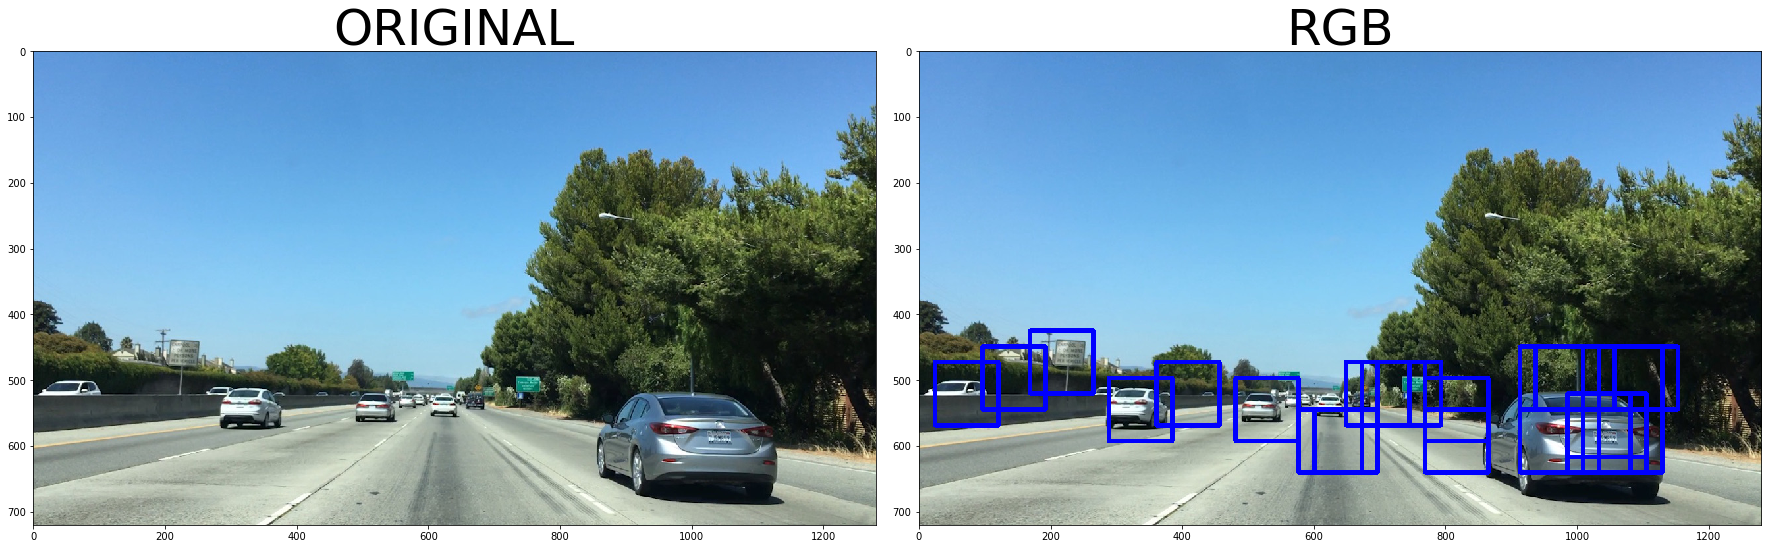

In [18]:
window_list= find_cars(image, \
            ystart, ystop, scale, \
            svc, X_scaler, \
            color_space, orient, pix_per_cell, cell_per_block,  spatial_size, hist_bins, hog_channel)
out_img = draw_boxes(image, window_list , color=(0, 0, 255), thick=6)
plot_2_images(image, out_img, "ORIGINAL", my_features['color_space'])

### 4. Storing Model and Parameters

In [ ]:
import pickle
    data={
        'svc'           : svc,
        'X_scaler'      : X_scaler,
        'color_space'   : color_space,
        'orient'        : orient,
        'pix_per_cell'  : pix_per_cell,
        'cell_per_block': cell_per_block,
        'spatial_size'  : spatial_size,
        'hist_bins'     : hist_bins,
        'hog_channel'   : hog_channel
         }

    with open(pFile, 'wb') as pFile:
        pickle.dump(data, pFile) 